In [31]:
%matplotlib inline  

import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import softmax
from math import ceil
np.random.seed(1001)

In [36]:
# utility init
#np.random()
sorted_u = {1:100, 2:20, 3:30}
cap = ceil(len(sorted_u)*(1-0.95))
print(cap)
max_u = max(sorted_u.values())
sum_u = sum(sorted_u.values())
v = np.array(list(sorted_u.values()))
print(v, type(v))
print(softmax(v))
print(v/sum_u)
prob = {}
print(reversed(sorted_u))
for k,v in reversed(sorted_u):
    prob[k] = v/max_u
print(prob)

1
[100  20  30] <class 'numpy.ndarray'>
[1.00000000e+00 1.80485139e-35 3.97544974e-31]
[0.66666667 0.13333333 0.2       ]


TypeError: 'dict' object is not reversible

[ 5  3  1  6  7  4  2  4  1  6  2  4  7  6  9  6  3  4  5  2  4  5  8 10
  7  3  4  4  3  7  5  3  3  7  6  4  6  5  4  5 10  3  6  3  7  8  3  5
  3  5  7  8  5  5  6  4  6  4  3  5  6  8  5  7  5  4  4  6  6  2  4  5
  4  6  6  5  4  2 10  6  2  5  5  7  3  4  5  6  4  9  5  4  5  2  5  6
  5  4  5  6]
[0.1875 0.375  0.4375]


(array([ 2.,  7., 12., 20., 23., 18.,  9.,  4.,  2.,  3.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

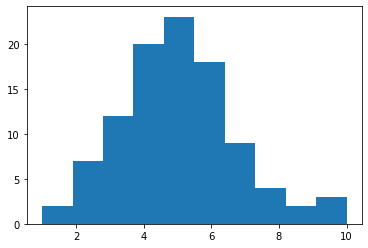

In [47]:
np.random.choice(list(sorted_u.keys()), 2, p=[0.1, 0.3, 0.6])
t_i = np.random.poisson(4, size=100) + 1
pdf = t_i[[1,3,4]]/sum(t_i[[1,3,4]])

print(t_i)
print(pdf)
plt.hist(t_i)

In [ ]:
num_users = 100
shard_per_user = 10
num_classes = 10
n_shard = shard_per_user*num_users
shard_per_class = int(shard_per_user * num_users / num_classes)
all_shards = list(range(num_classes)) * shard_per_class
#print(all_shards)
np.random.shuffle(all_shards)
#print(all_shards)


pdf = norm.pdf(range(num_users) , loc = int(num_users/2) , scale = int(num_users/3))
pdf = pdf / pdf.sum()
#print(pdf)
#print(np.sum(pdf))
#print(np.round(pdf*n_shard))
plt.plot(pdf*n_shard)

shard_owner = np.random.choice(range(num_users), size=n_shard-num_users, p = pdf)
shard_owner = np.concatenate((shard_owner, range(num_users)), axis=None)
print(list(shard_owner))
unbalanced_rand_set = []
for i in range(num_users): unbalanced_rand_set.append([])
for shard, owner in zip(all_shards, shard_owner):
    unbalanced_rand_set[owner].append(shard)

print(unbalanced_rand_set)
ret = plt.hist(shard_owner, bins = num_users)
cnt = ret[0]
assert(sum(cnt) == n_shard)
print(cnt)
print(max(cnt))
print(min(cnt))